In [376]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 4 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
dtypes: int64(4)
memory usage: 2.6 KB


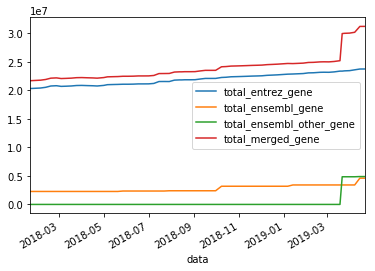

In [246]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("totals.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
del df["version_entrez"]
del df["version_ensembl"]
del df["version_ensembl_other"]
#df.version_ensembl_other.replace('None', 0, inplace=True)
df.info()
df.head()
df.plot()
#df

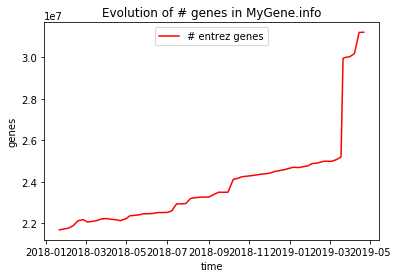

In [224]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df.index, df.total_merged_gene, label='# entrez genes',color="red")
plt.title('Evolution of # genes in MyGene.info')
ax.legend(loc='upper center')#, bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.ylabel('genes')
plt.show()

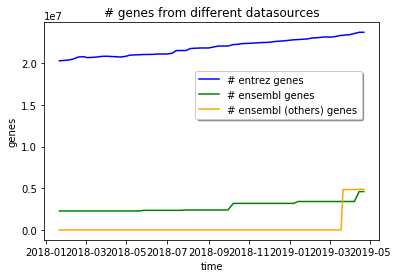

In [229]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df.index, df.total_entrez_gene, label='# entrez genes',color="blue")
ax.plot(df.index, df.total_ensembl_gene, label='# ensembl genes',color="green")
ax.plot(df.index, df.total_ensembl_other_gene, label='# ensembl (others) genes',color="orange")
plt.title('# genes from different datasources')
ax.legend(loc='upper center', bbox_to_anchor=(0.70, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.ylabel('genes')
plt.show()

In [48]:
#df = df.asfreq("1d",method="bfill")
df.info()
df



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 7 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


,total_entrez_gene,total_ensembl_gene,total_ensembl_other_gene,total_merged_gene,version_entrez,version_ensembl,version_ensembl_other
data,,,,,,,
2018-01-21,20313133,2273596,0,21686111,20180120,91,0
2018-02-04,20404516,2273596,0,21777526,20180203,91,0
2018-02-11,20527819,2273596,0,21900829,20180210,91,0
2018-02-18,20757784,2273596,0,22130811,20180217,91,0
2018-02-25,20802734,2273596,0,22175758,20180224,91,0
2018-02-26,20802734,2273596,0,22175758,20180224,91,0
2018-03-04,20692425,2273596,0,22065464,20180303,91,0
2018-03-11,20723651,2273596,0,22096690,20180309,91,0
2018-03-18,20763367,2273596,0,22136437,20180316,91,0


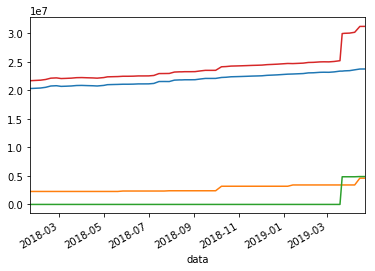

In [49]:
%matplotlib inline
df.total_entrez_gene.plot()
df.total_ensembl_gene.plot()
df.total_ensembl_other_gene.plot()
df.total_merged_gene.plot()

## Up until big step

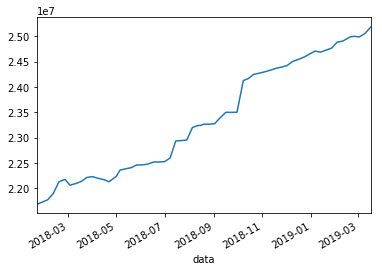

In [234]:
# up until big step
df.total_merged_gene[:-6].plot()
dfalmoststable = df[:-6]


adf: 0.10687849909200815
critical_values: {'10%': -2.5936515282964665, '1%': -3.5463945337644063, '5%': -2.911939409384601}


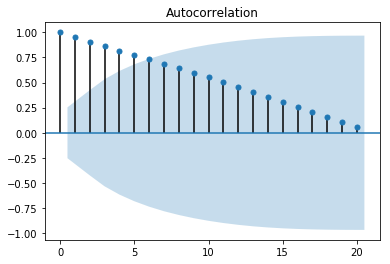

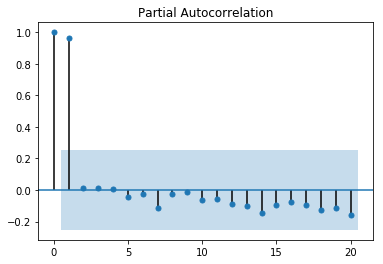

In [247]:
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(dfalmoststable.total_merged_gene)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
_ = plot_acf(dfalmoststable.total_merged_gene,lags=20)
_ = plot_pacf(dfalmoststable.total_merged_gene,lags=20)

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

## Positioning to a "plateau", around 2018-10 - 2019-03

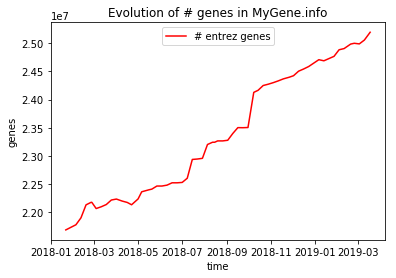

In [262]:
dfzoom = df[38:-6]
dfzoom = dfalmoststable # let's actually the whole history before the step
#dfzoom.total_merged_gene.plot()
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dfzoom.index, dfzoom.total_merged_gene, label='# entrez genes',color="red")
plt.title('Evolution of # genes in MyGene.info')
ax.legend(loc='upper center')#, bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.ylabel('genes')
plt.show()

adf: 0.10687849909200815
critical_values: {'10%': -2.5936515282964665, '1%': -3.5463945337644063, '5%': -2.911939409384601}


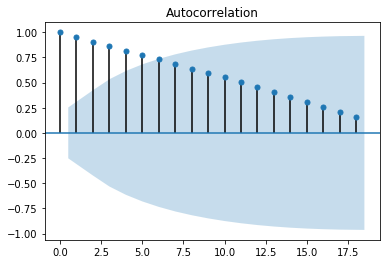

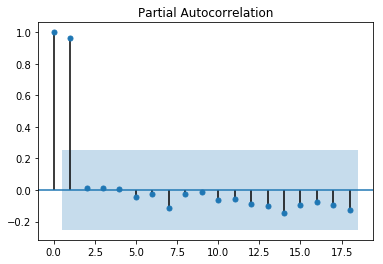

In [249]:
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(dfzoom.total_merged_gene)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
_ = plot_acf(dfzoom.total_merged_gene)
_ = plot_pacf(dfzoom.total_merged_gene)

ACF shows a high number of lags with strong positive & significant auto-correlations (there is a trend "going up", number of genes at t strongly depends on #genes at t-1 and it increases). https://people.duke.edu/~rnau/411arim2.htm

AD Fuller test show test statistic 1.20 is greater than all critical values, so we cannot reject the hypothesis that the time series is not stationary (it is not stationary since there's a trend), there's a "unit root test"


No handles with labels found to put in legend.


adf: -7.666831732082416
critical_values: {'10%': -2.5936515282964665, '1%': -3.5463945337644063, '5%': -2.911939409384601}


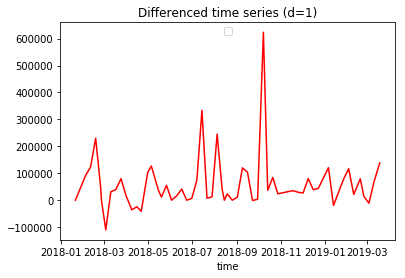

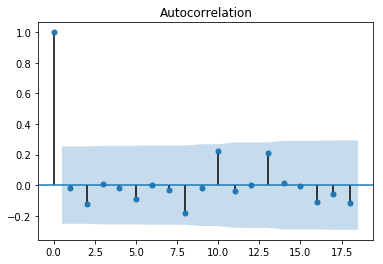

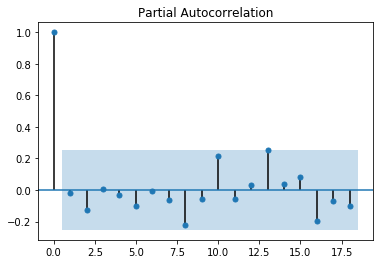

In [268]:
diff = dfzoom.total_merged_gene.diff(periods=1).fillna(0)
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(diff)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(diff.index, diff, color="red")
plt.title('Differenced time series (d=1)')
ax.legend(loc='upper center')#, bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.show()
#diff.plot()
_ = plot_acf(diff)
_ = plot_pacf(diff)

adf: -4.275489431031722
critical_values: {'10%': -2.595137155612245, '1%': -3.552928203580539, '5%': -2.9147306250000002}


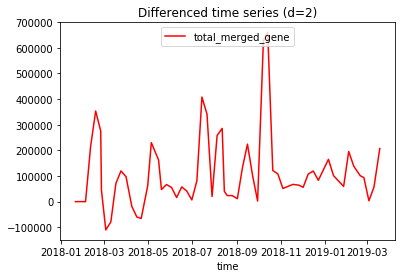

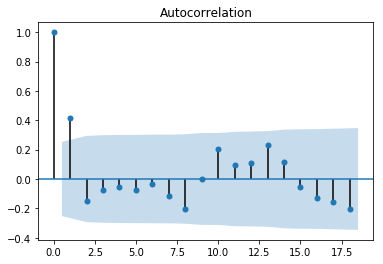

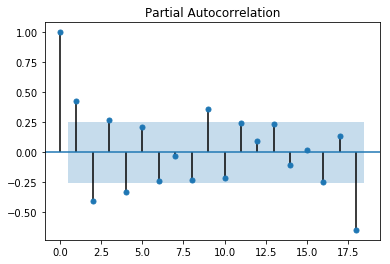

In [267]:
diff = dfzoom.total_merged_gene.diff(periods=2).fillna(0)
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(diff)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(diff.index, diff, color="red")
plt.title('Differenced time series (d=2)')
ax.legend(loc='upper center')#, bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.show()
#diff.plot()
_ = plot_acf(diff)
_ = plot_pacf(diff)

https://otexts.com/fpp2/non-seasonal-arima.html
https://machinelearningmastery.com/time-series-data-stationary-python/

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.total_merged_gene   No. Observations:                   59
Model:                  ARIMA(1, 1, 0)   Log Likelihood                -764.007
Method:                        css-mle   S.D. of innovations         101755.430
Date:                 Wed, 01 May 2019   AIC                           1534.014
Time:                         08:40:37   BIC                           1540.246
Sample:                              1   HQIC                          1536.447
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.945e+04   1.31e+04      4.552      0.000    3.39e+04    8.51e+04
ar.L1.D.total_merged_gene    -0.0146      0.130     -0.113      0.911      -0.

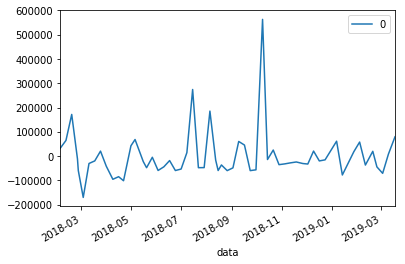

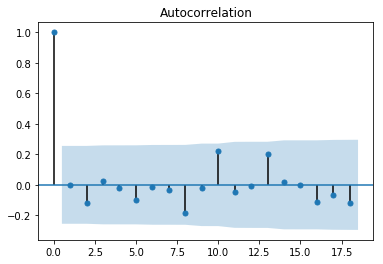

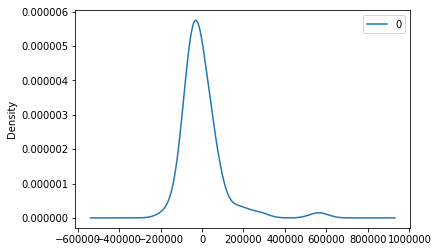

                   0
count      59.000000
mean      -19.610009
std    102628.899902
min   -170615.192155
25%    -48460.836513
50%    -24492.979558
75%     20338.101746
max    563276.189622


In [252]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dfzoom.total_merged_gene,order=(1,1,0))
results = model.fit(disp=1)
print(results.summary())
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
_ = plot_acf(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Predict

data
2018-01-21    21686111
2018-02-04    21777526
2018-02-11    21900829
2018-02-18    22130811
2018-02-25    22175758
2018-02-26    22175758
2018-03-04    22065464
2018-03-11    22096690
2018-03-18    22136437
2018-03-25    22216433
2018-04-01    22233758
2018-04-09    22197978
2018-04-16    22173675
2018-04-22    22132511
2018-05-01    22235757
2018-05-06    22362636
2018-05-16    22398135
2018-05-20    22409765
2018-05-27    22464803
2018-06-03    22464803
2018-06-10    22480676
2018-06-17    22522088
2018-06-24    22522064
2018-07-01    22528774
2018-07-08    22603085
2018-07-15    22936587
2018-07-22    22944013
2018-07-29    22956502
2018-08-05    23201875
2018-08-12    23242029
2018-08-15    23242029
2018-08-19    23265584
2018-08-26    23265443
2018-09-02    23277017
2018-09-09    23397289
2018-09-16    23501108
2018-09-23    23499827
2018-09-30    23503343
2018-10-08    24126889
2018-10-14    24163749
2018-10-21    24248214
2018-10-28    24271746
2018-11-04    24299405
2018-1

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


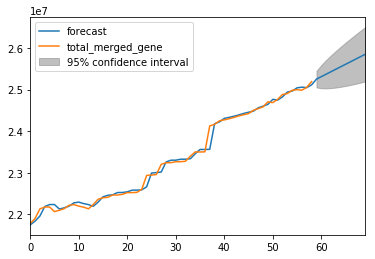

In [414]:
from sklearn.metrics import mean_squared_error
#print(dfzoom.index)
#results.plot_predict?
print(dfalmoststable.total_merged_gene)
results.plot_predict(end=70)#"2019-06-01")
#plt.show()
#preds = results.predict(start="2018-10-21",end=30)
#print(results.predict(start="2018-10-21",end=30))
forecast,stderr,conf_int = results.forecast()
print("Next release, there should be %s documents +/- %s ((or something between %s and %s)" % (forecast[0],stderr[0],conf_int[0][0],conf_int[0][1]))
actual = df.total_merged_gene["2019-03-21"]
print("The reality: %s, is it ok ? %s" % (actual, actual >= conf_int[0][0] and actual <= conf_int[0][0]))



## Exog

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:      total_merged_gene   No. Observations:                   61
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -784.919
Date:                Thu, 02 May 2019   AIC                           1575.838
Time:                        11:08:37   BIC                           1582.121
Sample:                             0   HQIC                          1578.295
                                 - 61                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
total_ensembl_other_gene     0.9805    182.873      0.005      0.996    -357.445     359.405
ar.L1                        0.0046      0.067      0.069      0.945      -0.126       0.

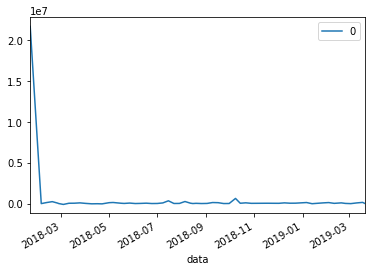

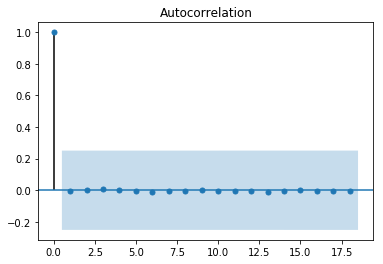

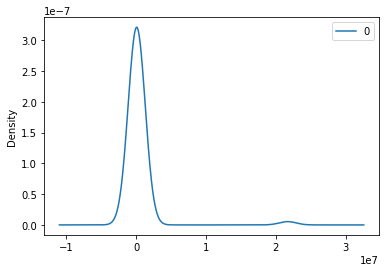

                  0
count  6.100000e+01
mean   4.111183e+05
std    2.771242e+06
min   -1.102940e+05
25%    5.887181e+03
50%    3.173491e+04
75%    7.981260e+04
max    2.168611e+07


In [489]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#ARIMA?
#print(df.total_ensembl_other_gene[:-4])
model = SARIMAX(df.total_merged_gene[:-5],order=(1,1,0),exog=df.total_ensembl_other_gene[:-5],enforce_stationarity=True)
results = model.fit(disp=1)
print(results.summary())
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
_ = plot_acf(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Predict

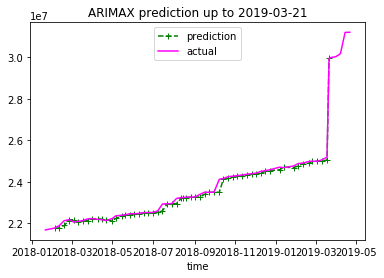

predict 29947654.3283652
The reality: 29947669


KeyError: '2019-03-24'

In [490]:
from sklearn.metrics import mean_squared_error
#print(dfzoom.index)
#_ = results.plot_predict(start="2018-10-21",end="2019-03-31",exog=df.total_ensembl_other_gene)
#dfalmoststable[['total_merged_gene']].plot()
#preds = results.predict(start="2018-10-21",end=30)
preds = results.predict(end=60)[1:]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(preds.index, preds, color="green",label="prediction",linestyle='dashed',marker="+")
ax.plot(df.index[:], df.total_merged_gene[:], label='actual',color="magenta")
plt.title('ARIMAX prediction up to 2019-03-21')
ax.legend(loc='upper center')#, bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('time')
plt.show()
print("predict %s" % results.predict()["2019-03-21"])
actual = df.total_merged_gene["2019-03-21"]
print("The reality: %s" % actual)
actual = df.total_merged_gene["2019-03-24"]
print("predict %s" % results.predict()["2019-03-24"])
print("The reality: %s" % actual)



Full predict

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.total_merged_gene   No. Observations:                   60
Model:                  ARIMA(1, 1, 0)   Log Likelihood                -884.220
Method:                        css-mle   S.D. of innovations         607722.004
Date:                 Thu, 02 May 2019   AIC                           1774.441
Time:                         09:41:26   BIC                           1780.724
Sample:                              1   HQIC                          1776.899
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.377e+05   1.12e+05      1.233      0.223   -8.12e+04    3.57e+05
ar.L1.D.total_merged_gene     0.2627      0.537      0.489      0.627      -0.

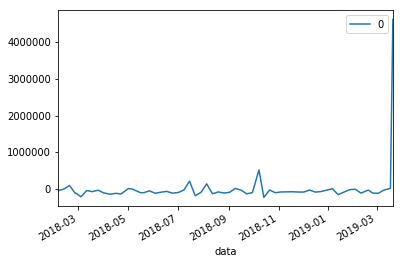

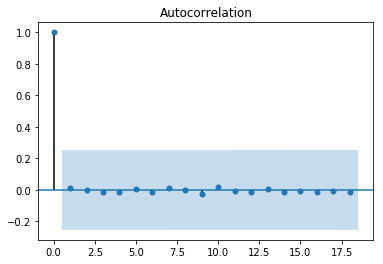

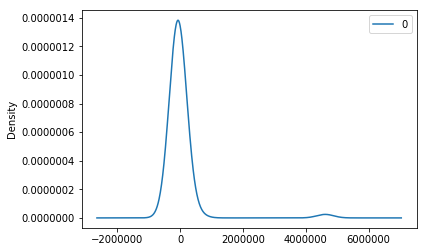

                  0
count  6.000000e+01
mean   2.021218e+04
std    6.125135e+05
min   -2.284728e+05
25%   -1.110857e+05
50%   -8.097769e+04
75%   -2.810607e+04
max    4.615931e+06


In [425]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.total_merged_gene[:-5],order=(1,1,0))
results = model.fit(disp=1)
print(results.summary())
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
_ = plot_acf(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [487]:
for i in range(5,0,-1):
    print(i)
    dt = df.index[-i]
    model = ARIMA(df.total_merged_gene[:-i],order=(1,1,0))
    results = model.fit()
    forecast,stderr,conf_int = results.forecast(steps=1,alpha=0.05)
    print("Next release %s, there should be %s documents +/- %s ((or something between %s and %s)" % (dt,forecast[0],stderr[0],conf_int[0][0],conf_int[0][1]))
    actual = df.total_merged_gene[dt]
    print("The reality: %s, is it ok ? %s" % (actual, (actual >= conf_int[0][0]) and (actual <= conf_int[0][1])))



5
Next release 2019-03-24 00:00:00, there should be 31298092.480467696 documents +/- 607722.0038973757 ((or something between 30106979.24021633 and 32489205.72071906)
The reality: 29990646, is it ok ? False
4
Next release 2019-03-31 00:00:00, there should be 30127107.160823815 documents +/- 604489.018825485 ((or something between 28942330.45487591 and 31311883.86677172)
The reality: 30028486, is it ok ? True
3
Next release 2019-04-07 00:00:00, there should be 30163334.464065827 documents +/- 599722.9649148002 ((or something between 28987899.05213124 and 31338769.876000416)
The reality: 30173256, is it ok ? True
2
Next release 2019-04-14 00:00:00, there should be 30307941.581679642 documents +/- 594945.5083400164 ((or something between 29141869.812569335 and 31474013.35078995)
The reality: 31199288, is it ok ? True
1
Next release 2019-04-21 00:00:00, there should be 31345543.758001823 documents +/- 600541.0083442283 ((or something between 30168505.01040777 and 32522582.505595878)
The re

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequen